# **COMP 2211 Exploring Artificial Intelligence**
## Lab 1 NumPy

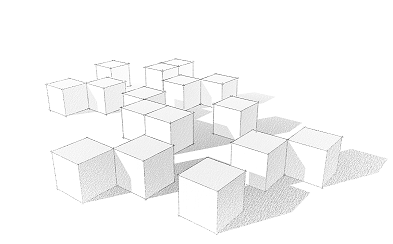

## Before We Begin

Run the code in the following cell. It will download the essential data for our uses. Please do it in Google Colab since they have a better internet connection.

Don't worry about your password being revealed, as it will be hidden.

In [2]:
"""
    Download CIFAR10 dataset from https://www.cs.toronto.edu/~kriz/cifar.html and extract the tarball
"""
!wget 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz' -O cifar-10-python.tar.gz
!tar xf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz
"""
    Download pictures of a present
"""
!wget 'https://cdn.pixabay.com/photo/2017/11/07/19/23/santa-claus-2927962_960_720.png' -O present.png

## Array Transpose and Reshaping

In machine learning, most calculations are performed using multi-dimensional arrays. (Remember this as a fact, and you'll see it very soon in later labs.) And since each multi-dimension array contains many different values, operations on these arrays are also more complicated.

One of the most common errors we would encounter is the mismatching of shapes. For example, we can't perform addition on arrays with 4 elements and 5 elements. This is because there are no intuitive ways to add them together. If this happens, an error will be raised.


In [ ]:
import numpy as np
x = np.arange(4)  # [0 1 2 3]
y = np.arange(5)  # [0 1 2 3 4]
z = x + y

ValueError: ignored

To solve this problem, one way would be to write better code. The code above doesn't make any sense. However, sometimes altering the shape of the arrays could be intended and essential for some operations. Therefore, we need to know how to do it correctly.

To demonstrate the importance of choosing the correct functions, we will talk about `numpy.reshape` and `numpy.transpose`. However, there are still many more [array manipulating functions](https://numpy.org/doc/stable/reference/routines.array-manipulation.html). You can read the documentation if you want to know more.

In [ ]:
import numpy as np

x = np.arange(6).reshape((2,3))  # [ [0 1 2]
                                 #   [3 4 5] ]
y = np.arange(6).reshape((3,2))  # [ [0 1]
                                 #   [2 3]
                                 #   [4 5] ]
z = np.arange(6).reshape((3,2))  # [ [0 1]
                                 #   [2 3]
                                 #   [4 5] ]

print(x)
print(y.transpose((1,0)))  # Standard transpose of 2D array
print(z.reshape(2,3))      # Reshape z to a 2D array of 2 rows and 3 cols

[[0 1 2]
 [3 4 5]]
[[0 2 4]
 [1 3 5]]
[[0 1 2]
 [3 4 5]]


As you can see, while y and z started the same, they ended up being two very different arrays even though they share the same shape. This is because, in the mathematical sense, a reshaped matrix is an entirely different matrix. There is, in fact, no such operations that resemble the functions of `reshape` in mathematics. However, transpose is an actual mathematical operation in linear algebra. It is simply flipping the matrix diagonally (draw a diagonal line from top left to bottom right, and flip along that line).
$$
\begin{align}
    \begin{pmatrix}
    0 & 1 & 2 \\
    3 & 4 & 5 \\
    6 & 7 & 8
    \end{pmatrix} ^T = 
    \begin{pmatrix}
    0 & 3 & 6 \\
    1 & 4 & 7 \\
    2 & 5 & 8
    \end{pmatrix}
\end{align}
$$

In [ ]:
print(y)
print(y.transpose(1, 0))

[[0 1]
 [2 3]
 [4 5]]
[[0 2 4]
 [1 3 5]]


You can also say transpose is to permutate the order of the dimension of the NumPy array, as demonstrated below.

In [ ]:
x = np.arange(8).reshape(2,2,2)   # x = [ [ [0 1]
                                  #         [2 3] ]
                                  #       [ [4 5]
                                  #         [6 7] ] ]
                                  # The 1st dimension refers to which layer, 
                                  # the 2nd dimension refers to which row,
                                  # the 3rd dimension refers to which column
print(x[0, :, 0])                 # The second axis of x
x_1 = x.transpose((1, 0, 2))      # x_1 equals to swapping the first and second axis
print(x_1[:, 0, 0])               # The first axis of x_1 

## More on `reshape`

So you might ask, why do we need to reshape the array at all if most of the time it doesn't make any mathematical sense? One of the answers is that sometimes, the number of dimensions of the arrays are not enough. For example, we mentioned we could add a new axis using reshape in our review. We can add however many axes we like to the array. The reshape would always be valid as long as the product of each axis is the same as the total amount of elements in the array. For example,

In [ ]:
x = np.arange(6)  # x = [0 1 2 3 4 5]
x.reshape((2, 3)) # Valid, x = [ 0 1 2
                  #              3 4 5 ]
x.reshape((6, 1)) # Valid, x = [ 0 
                  #              1
                  #              2
                  #              3
                  #              4
                  #              5
                  #              6 ]
x.reshape((2, 3, 1, 1, 1, 1, 1, 1)) # Valid, and probably too much axes
x.reshape((2, 3, -1)) # Valid. -1 means let NumPy decide the size of that axis. What is the last dimension?
# x.reshape((3, 3))   # Invalid, 3x3=9, but only 6 elements are presented

ValueError: cannot reshape array of size 6 into shape (3,3)

# Pre-Task: Read the Manual

The lab session is very short, and the capability of NumPy is vast. It is simply impossible for us to cover everything in NumPy in such a short lab session. To master it, you have to:
1. Read the documentation
2. Write a lot
3. Write more

If there's anything unclear in the notes, you can, of course, approach us, but most of the time, it would be much quicker if you Google it yourself. There are a vast amount of resources out there on the internet. It is not a problem to copy and paste, but you need to understand why and how people write the codes.

If you search for examples and documentation, Google will always be your good friend.

## Background of Image Processing ##

A digital image is a two-dimensional grid of intensity values, represented by $I(x,y)$, where $x$ and $y$ are coordinates, and the value of $I$ at coordinates $(x,y)$ is called intensity of the image.

*   Pixels: Short for Picture Eleemnt. A pixel is a single point (dot) in an image
*   Dimensions: The dimensions of images are specified by the width and height of the image.
> Image width is the number of columns in the image<br/>
> Image height is the number of rows in the image<br/><br/>
> 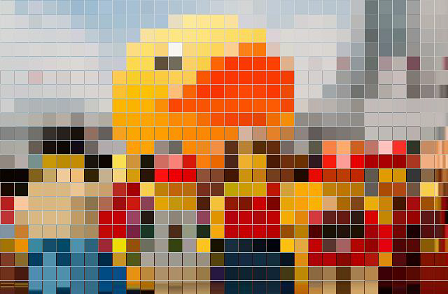 <br/>
> An image of dimensions $32\times31$ (i.e., image width = 32 pixels, image height = 21 pixels)

Color images have intensity from the darkest and lightest of 3 different colors, Red, Green, and Blue (RGB). The mixtures of these color intensities, they are also referred to as 24-bit color images. An 8-bit intensity range has 256 poissible values, 0 to 255.

Examples:
*   Black: RGB = (0, 0, 0)
*   White: RGB = (255, 255, 255)
*   Red: RGB = (255, 0, 0)
*   Green: RGB = (0, 255, 0)
*   Blue: RGB = (0, 0, 255)
*   Yellow: RGB = (255, 255, 0)


## Task 1: Extracting Images from CIFAR10

Let's do some exercise to get familiar with these functions.

Since our course focuses on machine learning, naturally, our end goal would be to successfully train a smart AI at the end of the course. However, to properly train a machine in **supervised** manner (you will learn this soon in class), we often need a large amount of training data and accurate labels (i.e., the corresponding answers, we call it a curated dataset). Let's take image classification as an example. The end goal of the task would be to build an AI that can accurately tell what is inside an image. So naturally, the input would be the image, and the output would be the answer. In this example, data and labels would be referring to the input and the output of the AI model, respectively. I.e. data would be the image, and labels would answer whether the picture is showing a Pikachu or Rick Astley.

While [getting the data is often easy](https://images.google.com/), labelling the images is not. Usually, we need tens of thousands, if not millions, of samples to obtain a functioning AI model. Currently, the [state-of-the-art image classification on ImageNet](https://paperswithcode.com/sota/image-classification-on-imagenet) (a famous general-purpose image dataset) is co-trained on a dataset called JFT-3B, which contains nearly 3 billion images. On this scale, it is indubitably infeasible to label images on our own. Luckily, there are plenty of large datasets online with decent label quality.

[CIFAR10](https://www.tensorflow.org/datasets/catalog/cifar10) is a very famous (relatively) small curated dataset among Computer Vision-related machine learning research. Due to its small size and good label quality, it is a very good toy example to test and prototype our models. Therefore, it would be nice to know <font color="red">how to extract images</font> from it as they have some bizarre way to store their images.

There are few files in the ```cifar-10-batches-py```, and in this lab, we're interested in ```data_batch_1```. This file is $\frac{1}{5}$ of the whole dataset, which contains 10,000 images. We already wrote some code to load the data in the following cell. And here are the variables you would need to use:

- `images` contains the raw pixels of the images
- `filenames` contains the filenames of each raw image

The first dimension of both variables is 10k, which corresponds to the total number of images. And they have the same order. I.e., `images[43]` and `filenames[43]` would be raw pixels values and the file name of the 44<sup>th</sup> image.

In [ ]:
import pickle
import matplotlib.pyplot as plt
with  open('./cifar-10-batches-py/data_batch_1', 'rb') as f:
    data = pickle.load(f, encoding='bytes') # data is a dictionary with keys b'data', b'filenames', b'labels', b'batch_label'
images = data[b'data'] # raw pixels of 10k images
filenames = np.array(data[b'filenames']) # filenames of the 10k images
data[b'data'].shape # (10000, 3072)

from PIL import Image
def check_all_pixels(x, y):
    """
        helper function for validating if two image are indeed the same
    """
    x = np.array(Image.open(x).convert('RGB')) # Open image, convert to 'RGB' color scheme (in case the picture isn't) and parse it to numpy ndarray
    y = np.array(Image.open(y).convert('RGB'))
    return np.all(x == y) # Return True if and only if all values in the two arrays are the same

### Task 1.1: Finding Images with Filenames

Now, using Boolean indexing, please extract the images with the name ```b'coupe_s_002178.png'```, ```b'capreolus_capreolus_s_000073.png'```, `b'leptodactylus_pentadactylus_s_000004.png'`. <font color="red">**The 'b' in front of the string cannot be ignored**</font> (For details, please search `Byte string` in Google. The dictionary entries are byte strings probably because the pickle file was saved using c/c++ program, which uses different format to represent string than Python.).

In [ ]:
"""
    TODO: Extract the three images from `images` where their file name is in 
    [b'coupe_s_002178.png', b'capreolus_capreolus_s_000073.png', b'leptodactylus_pentadactylus_s_000004.png'] and save to the variable ```extracted_images```.
    
    Hint: You might use `np.logical_or` or `|` which are the same. (Please read the review section if you forgot)
    You might also want to place appropriate parathesis `()` to avoid ambiguity if you're using `|`.
"""
### START CODE HERE ### (≈ 1 line of code)
extracted_images = None
### END CODE HERE ###

In [ ]:
### Sanity Check ###
extracted_images.shape == (3, 3072) # It should have shape (3, 3072)

### Task 1.2: Reshape and Transpose

You have extracted raw data of the three images, and we want to plot it using libraries. However, we can't plot it directly, as our library (`matplotlib.pyplot`) expects our image to have a shape of ```(H, W, C)``` where H, W is the height and width of the images, respectively, and C represents the number of channels. In our case, `C=3` (RGB). However, our current image has the shape of `(3072, )`. This is because when the author of CIFAR10 save the image, the image data is saved as `[the values of red pixels, the values of green pixel, the values of blue pixel]`. Therefore, we have to reshape (and probably some more other kind of functions) to modify the array such that each image has the shape of `(32, 32, 3)`.

TypeError: Invalid shape (3072,) for image data

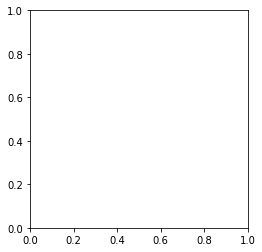

In [ ]:
plt.imshow(extracted_images[0]) # We can't plot it directly!

In [ ]:
"""
    TODO: Reshape the array such that it is a 4D array with shape (3, 32, 32, 3) 
    and the image looks the same as the provided samples. (look at the png in the folder)
    Save to the variable ```reshaped_images```.
"""
### YOUR CODE HERE ### (≈ 1 lines of code)
reshaped_images = None
### END CODE HERE ###

# This part of code is to plot and help you check if you have done the reshaping correctly.
for i, le_image in enumerate(reshaped_images):
    fig = plt.figure(frameon=False)
    plt.axis('off')
    plt.imshow(le_image)
    plt.savefig(f'./cifar_{i}_submit.png', bbox_inches='tight', pad_inches=0)

### Expected Result

You should observe these three images.

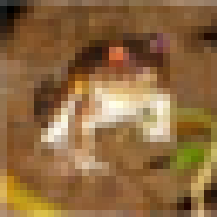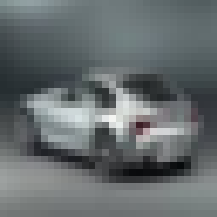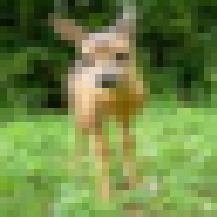

## Task 1.3 Visualization of Transpose

In [ ]:
"""
    TODO: Now, try swapping the first and second axis of the image (or second or third axis of the 4d array), 
    how are these images compared to the original images?
    Save to the variable ```transposed_images```.
"""
### START CODE HERE ### (≈ 1 lines of code)
transposed_images = None
### END CODE HERE ###

for i, le_image in enumerate(transposed_images):
    fig = plt.figure(frameon=False)
    plt.axis('off')
    plt.imshow(le_image)
    plt.savefig(f'./cifar_{i}_t_submit.png', bbox_inches='tight', pad_inches=0)

### Expected Result

You should observe these three images.

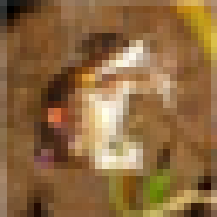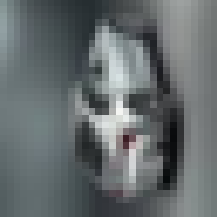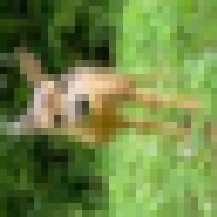

## Task 2 Image Enhancement (Image Augmentation): Contrast Adjustment

If you have fiddled with your electronic devices for a bit, you might have heard of contrast adjustment. In short, it's a way to make the	image	features stand out more clearly. In this lab, we will walk you through one of the simpler ways to adjust contrast.

First, let's talk about how an image is represented in multi-dimensional array.

Usually, images are represented in multi-dimensional arrays with the shape either like $(H, W, C)$ or $(C, H, W)$ (Which we have shown in the previous task). And usually, an Image contains 3 channels: Red, Green, Blue. So, in some sense, you can think as if three images of different channels got smashed and turned into one image.

### Task 2.1: Greyscale

For the contrast adjustment, we first need to convert our image to greyscale. To do so, we would calculate the new pixel value like this:

$$
    0.299 * R + 0.587 * G + 0.114 * B
$$

where R, G, B represent Red, Green, Blue values, respectively.

To practice coding in NumPy, we will ask you to use `np.dot` (or `@`) (But you can also do it on each channel individually). It does matrix multiplication (in linear algebra way instead of elementwise). The shape of the matrices would look like: `(m, n)@(n, k)=(m, k)`

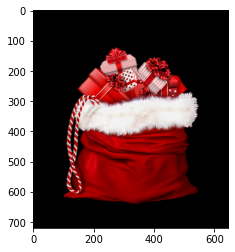

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image = np.array(Image.open('present.png').convert('RGB'))
plt.imshow(image)

In [ ]:
"""
    Save greyscaled version of the image to the variable ```grey_image``` according to the given
"""
luminance = np.array([0.299, 0.587, 0.114]) # Luminance coefficients
### START CODE HERE ### (≈ 1 line of code. Hint: Try fiddle around by looking at the shape of the arrays. The result image might or might not have 3 channels)
grey_image = None
### END CODE HERE ###
plt.imshow(grey_image, cmap='gray', vmin=0, vmax=255)

## Expected Result

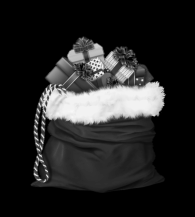

## Task 2.2 Take Ratio

Lastly, the new pixel value of the adjusted image would be:

$$
    I_{new, ij} = \alpha\times grey_{ij} + (1-\alpha)\times I_{ori, ij}
$$

where $\alpha$ is a value between 0 (inclusive) and 1 (inclusive) and in this example, we take $\alpha=0.5$

(Hint: the operations in this formula are pixel-wise, as hinted by the subscript ${}_{ij}$. You might want to reshape the greyscale image depending on how you code the previous step)

In [ ]:
alpha = 0.5
### START CODE HERE ### (≈ 1 line of code)
new_image = None
### END CODE HERE ###

plt.axis('off')
plt.imshow(new_image.astype(np.uint8))
plt.savefig(f'./present_submit.png', bbox_inches='tight', pad_inches=0)

## Expected Result

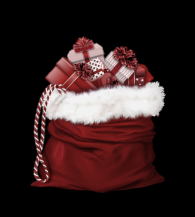

## Disclaimer
<font color="gray">~~This is not a good contrast adjusting algorithm at all.~~</font>

## Task 3: Familiarize with NumPy Functions: Generating and Plotting Exponential Curve

We have done reshaping and matrix arithmetic in the previous two tasks.
However, there are still tones of Numpy functions we haven't gone through or didn't talk about. So, from these tasks, instead of teaching you step by step how to do it, we hope you can start finding answers through the internet (e.g. Google). But of course, not everyone catch up quick and know what even to Google. In this case, don't hesitate and feel free to ask question ;). We all got our own office (zoom) hours.

In this task, we will plot a simple function, exponential curve $y=e^t$. But this time, we'll instead demonstrate an example code. We hope you can learn from it without us explaining (although there're comments) and writing your own slightly simpler version. It's just like how you typically search answers online. (So technically, now you're my machine learning model. :DDD)

We gave you the data (drawing some graph) and label (example code and image), and you take input (drawing exponential graph) and output something (code and image)) Please try your best to obtain the answers by searching on the internet.

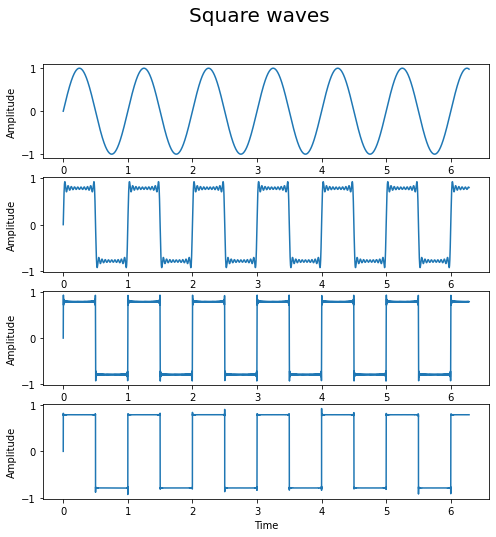

In [10]:
import numpy as np
import matplotlib.pyplot as plt

"""
    Demonstration of Fourier Decomposition of Square Waves
    Referenced from: https://en.wikipedia.org/wiki/Square_wave
"""

t = np.linspace(0, np.pi * 2, 10000) # Create array with 10,000 values ranging from 0 to 2*pi

fig, axs = plt.subplots(4, 1, figsize=(8,8)) # Create plot with 4 rows and 1 column. Is that really needed for plotting 1 simple exponential curve?
fig.suptitle('Square waves', fontsize=20) # Naming the figure for the fancy presentation.

for i in range(4):
    stack_of_functions = [((2 * k + 1)**-1) * np.sin(2 * np.pi * t * (2 * k + 1)) for k in range(10 ** i)] # Fourier decomposition of square waves
    stack_of_functions = np.vstack(stack_of_functions) # Turn array of 1d ndarray to 2d ndarray.

    square_wave = stack_of_functions.sum(axis=0) # Sum all sine waves
    axs[i].set(xlabel='Time', ylabel='Amplitude') # Fancy axis labeling
    axs[i].plot(t, square_wave) # Plot the graphs

fig.show() # In normal python program (i.e. not using notebook but running normal python program), you need to run this line in order to show what you have plot

By referencing the example above, please plot the curve of $y=e^t$. The domain (t-axis/x-axis) could be anything.

In [17]:
### START OF YOUR CODE ###
# GOAL: Plot any exponential curve #

### END OF YOUR CODE ###
# There's no correct answer for this

# Submission

There's no need to submit anything because this lab isn't graded. Only even labs will be graded.

In [ ]:
### This is the end of the lab
### Referenced from COMP2211 Notes, NumPy official documentation, and stackoverflow
### Created by Nai Chit FUNG and edited by Desmond Tsoi for the purposes of teaching COMP2211